In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import re

In [56]:
spam_email = pd.read_csv('SMSSpamCollection',sep='\t', header=None,names=['Label', 'SMS'])

In [57]:
spam_email.columns

Index(['Label', 'SMS'], dtype='object')

In [58]:
spam_email.shape

(5572, 2)

In [59]:
spam_email.head(5)

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
spam_email['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [61]:
label_counts = spam_email['Label'].value_counts()

In [62]:
# Calculate the percentages of each label
total_messages = len(spam_email)
spam_percentage = (label_counts['spam'] / total_messages * 100)
ham_percentage = (label_counts['ham'] / total_messages * 100)

In [63]:
print(f"Percentage of spam messages: {spam_percentage:.2f}%")
print(f"Percentage of ham messages: {ham_percentage:.2f}%")

Percentage of spam messages: 13.41%
Percentage of ham messages: 86.59%


<Axes: xlabel='count', ylabel='Label'>

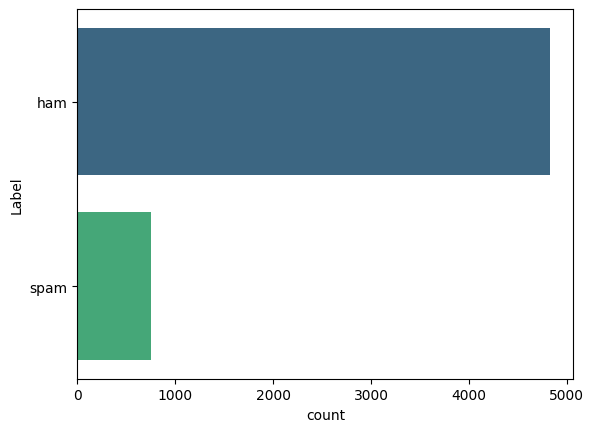

In [64]:
#Visualization
# Majority of the emails are ham
sns.countplot(y='Label', data=spam_email,palette='viridis')

In [65]:
# Randomize the entire dataset
randomized_df = spam_email.sample(frac=1, random_state=1)


# Split the dataset into the training and test sets (80% training , 20% testing)

train_size = int(0.8 * len(randomized_df))
train_set = randomized_df[:train_size]
test_set = randomized_df[train_size:]


# Reset the index labels for both datasets
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

# Find the percentage of spam and ham in the full dataset
full_dataset_size = len(randomized_df)
full_spam_percentage = (randomized_df['Label'].value_counts()['spam'] / full_dataset_size) * 100
full_ham_percentage = (randomized_df['Label'].value_counts()['ham'] / full_dataset_size) * 100

# Find the percentage of spam and ham in the training set
train_spam_percentage = (train_set['Label'].value_counts()['spam'] / len(train_set)) * 100
train_ham_percentage = (train_set['Label'].value_counts()['ham'] / len(train_set)) * 100

# Find the percentage of spam and ham in the test set
test_spam_percentage = (test_set['Label'].value_counts()['spam'] / len(test_set)) * 100
test_ham_percentage = (test_set['Label'].value_counts()['ham'] / len(test_set)) * 100

# Print the percentages
print(f"Full Dataset - Spam: {full_spam_percentage:.2f}%, Ham: {full_ham_percentage:.2f}%")
print(f"Training Set - Spam: {train_spam_percentage:.2f}%, Ham: {train_ham_percentage:.2f}%")
print(f"Test Set - Spam: {test_spam_percentage:.2f}%, Ham: {test_ham_percentage:.2f}%")








Full Dataset - Spam: 13.41%, Ham: 86.59%
Training Set - Spam: 13.46%, Ham: 86.54%
Test Set - Spam: 13.18%, Ham: 86.82%


In [66]:
# Removing the punctuation from the SMS column
train_set['SMS'] = train_set['SMS'].str.replace('\W', ' ')

# Convert all letters in every word to lower case
train_set['SMS'] = train_set['SMS'].str.lower()

# Print the first few rows to check the result
train_set.head(5)

C:\Users\chimi\AppData\Local\Temp\ipykernel_24908\1570059114.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set['SMS'] = train_set['SMS'].str.replace('\W', ' ')


,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


In [67]:
# Create a unique list of words
train_set['SMS'] = train_set['SMS'].str.split()

vocabulary = []

for sms in train_set['SMS']:
    for word in sms:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

In [68]:
len(vocabulary)

7782

In [69]:
word_counts_per_sms = {unique_word: [0] * len(train_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(train_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

In [70]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,venaam,buz,hav2hear,burnt,obese,unfortunately,webpage,hearts,bak,snow,...,donate,guitar,bcmsfwc1n3xx,collected,aretaking,11pm,domain,afghanistan,patients,belive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
train_df = pd.concat([train_set, word_counts], axis=1)
train_df.head()

,Label,SMS,venaam,buz,hav2hear,burnt,obese,unfortunately,webpage,hearts,...,donate,guitar,bcmsfwc1n3xx,collected,aretaking,11pm,domain,afghanistan,patients,belive
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Step 1: Calculate the length of messages
total_messages = len(train_df)

# Step 2: Calculate the prior probabilities for each class
class_counts = train_df['Label'].value_counts()
p_spam = class_counts['spam'] / total_messages
p_ham = class_counts['ham'] / total_messages

# Step 3: Preprocess the text data in the 'SMS' column
train_df['SMS'] = train_df['SMS'].apply(' '.join)

# Step 4: Calculate the total count of words in each class
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# Step 5: Calculate the probability of each word given each class using Laplace smoothing
alpha = 1  # Laplace smoothing parameter

# Initialize dictionaries to store probabilities for each class (Spam and Ham)
prob_word_given_spam = {}
prob_word_given_ham = {}

# Calculate probabilities for each word in the vocabulary for each class
for word in vocabulary:
    # Calculate P(word|Spam)
    word_count_in_spam = spam_messages['SMS'].apply(lambda sms: word in sms).sum()
    prob_word_given_spam[word] = (word_count_in_spam + alpha) / (n_spam + alpha * len(vocabulary))

    # Calculate P(word|Ham)
    word_count_in_ham = ham_messages['SMS'].apply(lambda sms: word in sms).sum()
    prob_word_given_ham[word] = (word_count_in_ham + alpha) / (n_ham + alpha * len(vocabulary))


In [87]:
def predict_class(message):
    # Preprocess the new message
    preprocessed_message = re.sub('\W', ' ', message.lower()).split()

    # Initialize log probabilities for each class
    log_p_spam_given_message = np.log(p_spam)
    log_p_ham_given_message = np.log(p_ham)

    # Calculate log probabilities for each word in the message
    for word in preprocessed_message:
        if word in prob_word_given_spam:
            log_p_spam_given_message += np.log(prob_word_given_spam[word])
        if word in prob_word_given_ham:
            log_p_ham_given_message += np.log(prob_word_given_ham[word])

    # Compare log probabilities and predict the label
    if log_p_spam_given_message > log_p_ham_given_message:
        return 'spam'
    else:
        return 'ham'


In [88]:
predict_class('Winner! You have the won the lottery')

'spam'

In [89]:
predict_class('Hi! How are you?')

'ham'

In [91]:
# Measuring the accuracy of this filter
test_set['predicted'] = test_set['SMS'].apply(predict_class)
test_set.head(5)

,Label,SMS,predicted
0,ham,Wherre's my boytoy ? :-(,ham
1,ham,Later i guess. I needa do mcat study too.,ham
2,ham,But i haf enuff space got like 4 mb...,ham
3,spam,Had your mobile 10 mths? Update to latest Oran...,spam
4,ham,All sounds good. Fingers . Makes it difficult ...,ham


In [95]:
# Write the function to measure the accuracy of the model
correct = 0
total = test_set.shape[0]
    
for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1
        
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1101
Incorrect: 14
Accuracy: 0.9874439461883409
